In [1]:
# 📌 Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Display settings
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


## 🎯 **Objective**

The aim of this project is to:

1. Perform **exploratory data analysis (EDA)** on the Diabetes dataset.
2. Build a **Logistic Regression model** to predict whether a patient has diabetes based on diagnostic measurements.

---


In [2]:
# 📌 Loading the Dataset

df = pd.read_csv('diabetes.csv')  # Update path if needed
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 🔍 **Dataset Overview**

- **Rows:** 768  
- **Columns:** 9  
- **Target variable:** Outcome (1 = Diabetic, 0 = Non-diabetic)

---


In [3]:
# 📌 Checking Dataset Info

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# 📌 Checking Missing Values

df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### ✅ **Observations on Missing Values**

No missing values detected, but zeros in some columns indicate missing measurements. We will check for this next.

---


In [5]:
# 📌 Checking for Zero Values in Columns

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    print(f'{col} has {(df[col]==0).sum()} zero values')


Glucose has 5 zero values
BloodPressure has 35 zero values
SkinThickness has 227 zero values
Insulin has 374 zero values
BMI has 11 zero values


### ⚠️ **Observation**

Columns like **Glucose, BloodPressure, SkinThickness, Insulin, BMI** have zeros, which are invalid in a medical context. We will replace these with the respective column **median values**.

---


In [6]:
# 📌 Replacing Zero Values with Median

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())


In [7]:
# 📌 Confirming Replacement

df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 📊 **Exploratory Data Analysis (EDA)**

We will now visualise key features to understand their distribution and relationship with diabetes outcome.

---


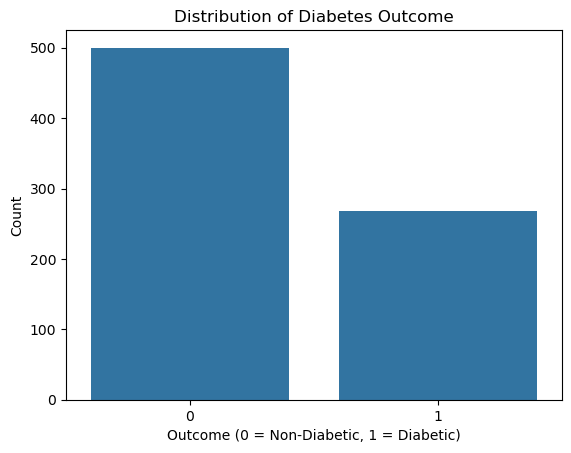

In [8]:
# 📌 Distribution of Outcome

sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Count')
plt.show()


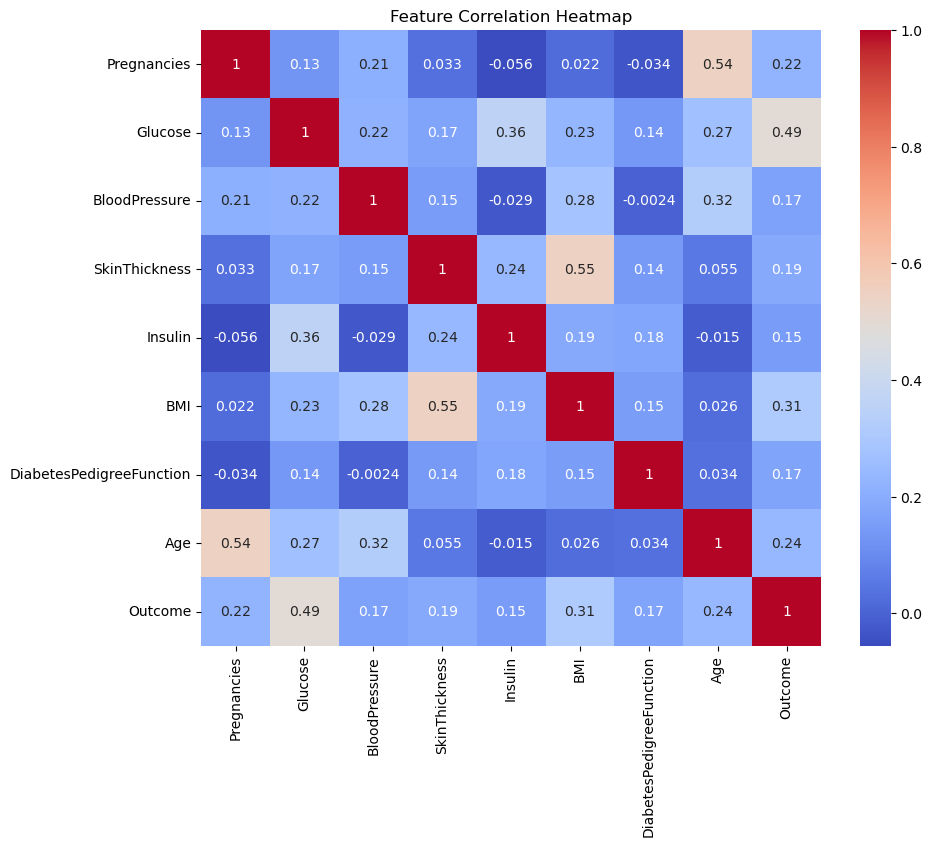

In [9]:
# 📌 Checking Correlation Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


### 🔍 **Key Insights**

- **Glucose, BMI, Age, Insulin, Pregnancies** show positive correlation with diabetes outcome.
- **SkinThickness and BloodPressure** have lower correlation.

---


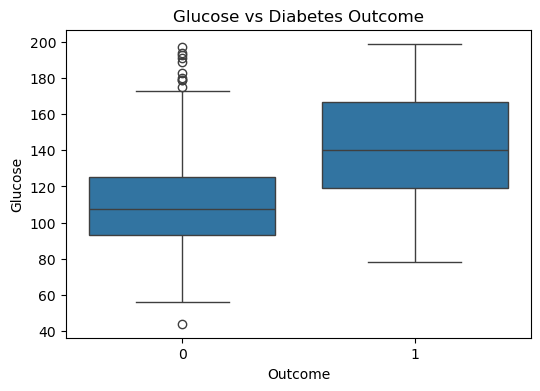

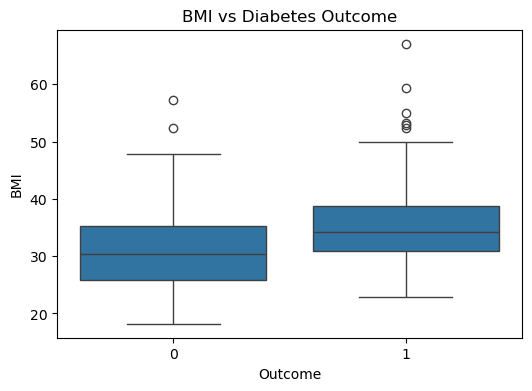

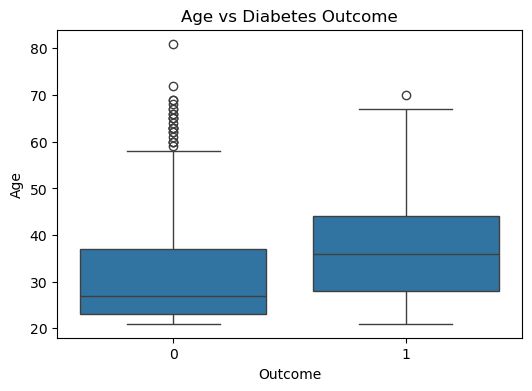

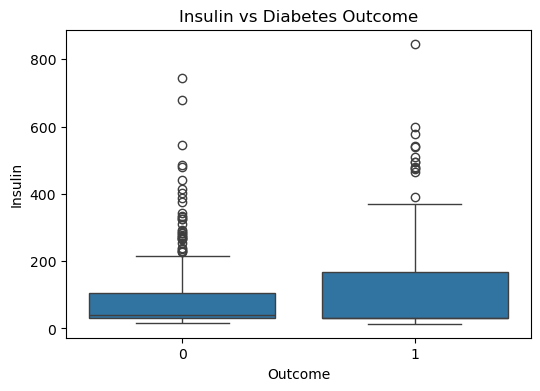

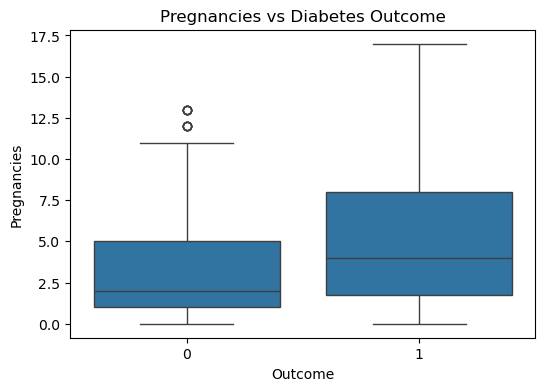

In [10]:
# 📌 Boxplots of Key Features vs Outcome

features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Pregnancies']

for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} vs Diabetes Outcome')
    plt.show()


## 🤖 **Model Building**

We will build a **Logistic Regression model** to predict diabetes outcome.

---


In [11]:
# 📌 Splitting Data into Train and Test

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (614, 8)
Testing data shape: (154, 8)


In [12]:
# 📌 Training Logistic Regression Model

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [13]:
# 📌 Making Predictions

y_pred = model.predict(X_test)


In [14]:
# 📌 Evaluating Model Performance

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7727272727272727

Confusion Matrix:
 [[83 16]
 [19 36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## 🎯 **Model Summary**

- **Algorithm used:** Logistic Regression  
- **Accuracy achieved:** *(Add your output here)*

### 💡 **Key Learnings**

✅ Data cleaning (handling zeros as missing values)  
✅ Visualising data distributions and relationships  
✅ Building and evaluating a logistic regression model for binary classification

---

### 📌 **Future Scope**

- Implement advanced models like Random Forest or XGBoost for improved accuracy  
- Perform hyperparameter tuning  
- Deploy as a web application for interactive predictions

---
